# 정렬 기반 알고리즘 프로토타입

In [27]:
# 테스트할 모의 데이터 생성
import numpy as np
import pandas as pd

# 랜덤 시드 고정
np.random.seed(21354)

# 모집단 평균과 표준편차 설정
mu_x1, sigma_x1 = 70, 10
mu_x2, sigma_x2 = 50, 15

# 100명의 index, name 생성
index = np.arange(1, 101)
names = [f"Person_{i:03d}" for i in index]

# 정규분포 기반 점수 생성 (정규화된 분포를 가정)
x1 = np.round(np.random.normal(mu_x1, sigma_x1, size=100),2)
x2 = np.round(np.random.normal(mu_x2, sigma_x2, size=100),2)

# 남자, 여자 구분을 위한 성별 데이터 생성
sex = np.random.choice([1,2], size=100, p=[0.4, 0.6])  # 1: 남자, 2: 여자

# 상담 유무 구분을 위한 데이터 생성
counseling = np.random.choice([0,1], size=100, p=[0.8, 0.2])  # 0: 상담 없음, 1: 상담 있음

# 데이터프레임 구성
df = pd.DataFrame({
    'index': index,
    'name': names,
    'sex' : sex,
    'x1': x1,
    'x2': x2,
    'counseling': counseling
})

In [29]:
from collections import defaultdict

df_sorted_first = df.sort_values(by=['x1', 'x2'], ascending=False).reset_index(drop=True)
df_sorted_first['group'] = None
print(df_sorted_first)

    index        name  sex     x1     x2  counseling group
0      18  Person_018    2  93.30  45.40           1  None
1      32  Person_032    1  89.82  65.40           1  None
2      96  Person_096    2  89.05  36.65           1  None
3      26  Person_026    2  88.31  58.00           1  None
4      66  Person_066    1  84.77  26.53           1  None
..    ...         ...  ...    ...    ...         ...   ...
95     19  Person_019    2  52.94  70.18           0  None
96     88  Person_088    2  52.68  66.29           0  None
97     36  Person_036    2  50.89  46.98           0  None
98     92  Person_092    1  50.20  48.03           0  None
99     83  Person_083    2  44.98  63.72           0  None

[100 rows x 7 columns]


### 우선 범주형 고려 안하고 연속형으로 진행 했을 때

In [30]:
# round-robin 방식으로 그룹 통계 생성
group_count = 4
for i, idx in enumerate(df_sorted_first.index):
    group = i % group_count # 나머지로 그룹 번호 결정 (0, 1, 2, 3)
    df_sorted_first.at[idx, 'group'] = group
print(df_sorted_first)

    index        name  sex     x1     x2  counseling group
0      18  Person_018    2  93.30  45.40           1     0
1      32  Person_032    1  89.82  65.40           1     1
2      96  Person_096    2  89.05  36.65           1     2
3      26  Person_026    2  88.31  58.00           1     3
4      66  Person_066    1  84.77  26.53           1     0
..    ...         ...  ...    ...    ...         ...   ...
95     19  Person_019    2  52.94  70.18           0     3
96     88  Person_088    2  52.68  66.29           0     0
97     36  Person_036    2  50.89  46.98           0     1
98     92  Person_092    1  50.20  48.03           0     2
99     83  Person_083    2  44.98  63.72           0     3

[100 rows x 7 columns]


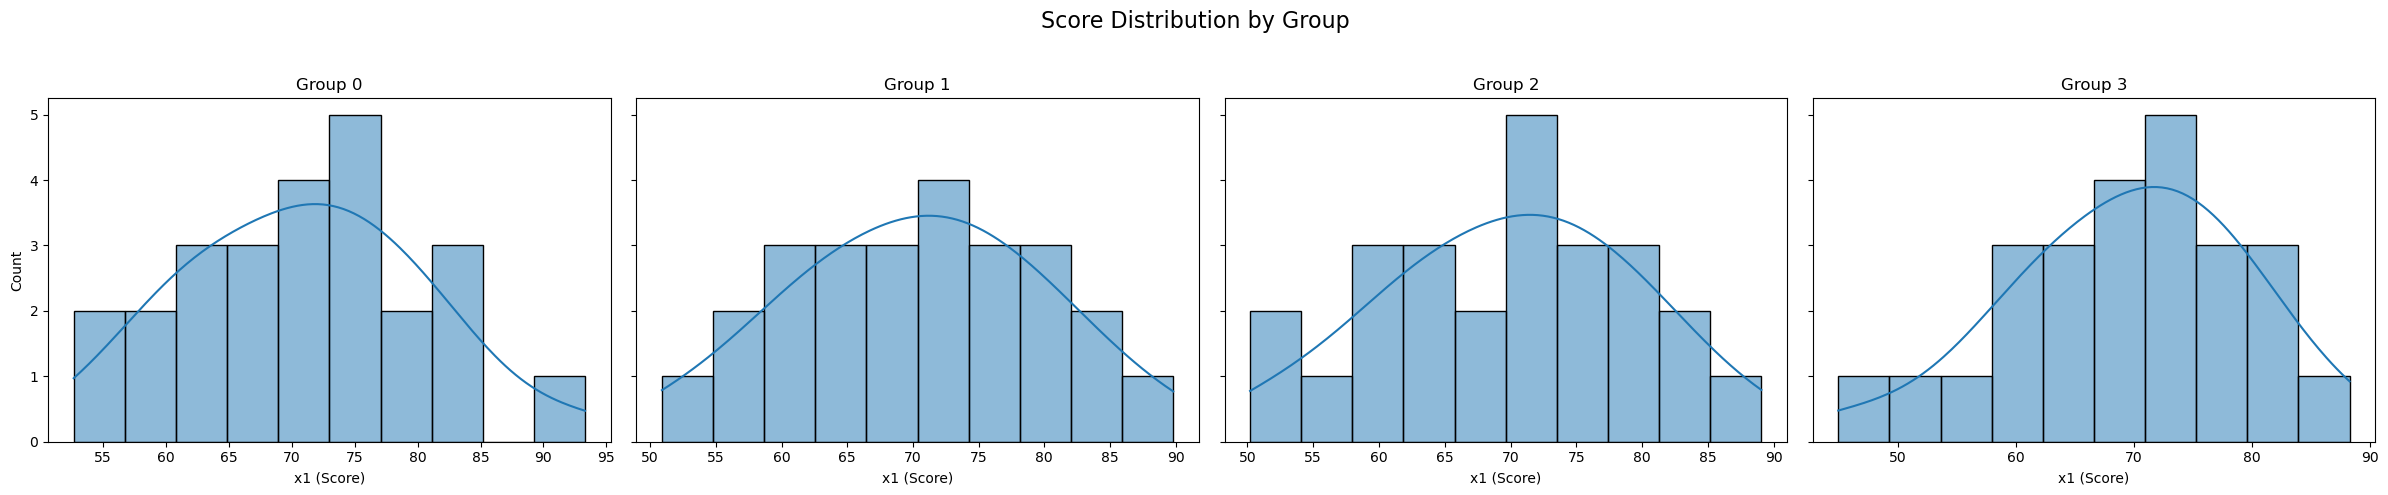

In [31]:
# 그룹별 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 고유 그룹 수
group_labels = sorted(df_sorted_first['group'].unique())
n_groups = len(group_labels)

# 서브플롯 생성
fig, axes = plt.subplots(1, n_groups, figsize=(6 * n_groups, 5), sharey=True)

# 그룹별 플롯 그리기
for i, g in enumerate(group_labels):
    ax = axes[i]
    sns.histplot(df_sorted_first[df_sorted_first['group'] == g]['x1'],
                 kde=True, bins=10, alpha=0.5, ax=ax)
    ax.set_title(f"Group {g}")
    ax.set_xlabel("x1 (Score)")
    ax.set_ylabel("Count")

plt.suptitle("Score Distribution by Group", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [32]:
# serpentine 방식으로 그룹 통계 생성
group_count = 4
direction = 1
group = 0
for i, idx in enumerate(df_sorted_first.index):
    df_sorted_first.at[idx, 'group'] = group
    group += direction
    if group == group_count or group < 0:
        direction *= -1
        group += direction
print(df_sorted_first)

    index        name  sex     x1     x2  counseling group
0      18  Person_018    2  93.30  45.40           1     0
1      32  Person_032    1  89.82  65.40           1     1
2      96  Person_096    2  89.05  36.65           1     2
3      26  Person_026    2  88.31  58.00           1     3
4      66  Person_066    1  84.77  26.53           1     3
..    ...         ...  ...    ...    ...         ...   ...
95     19  Person_019    2  52.94  70.18           0     0
96     88  Person_088    2  52.68  66.29           0     0
97     36  Person_036    2  50.89  46.98           0     1
98     92  Person_092    1  50.20  48.03           0     2
99     83  Person_083    2  44.98  63.72           0     3

[100 rows x 7 columns]


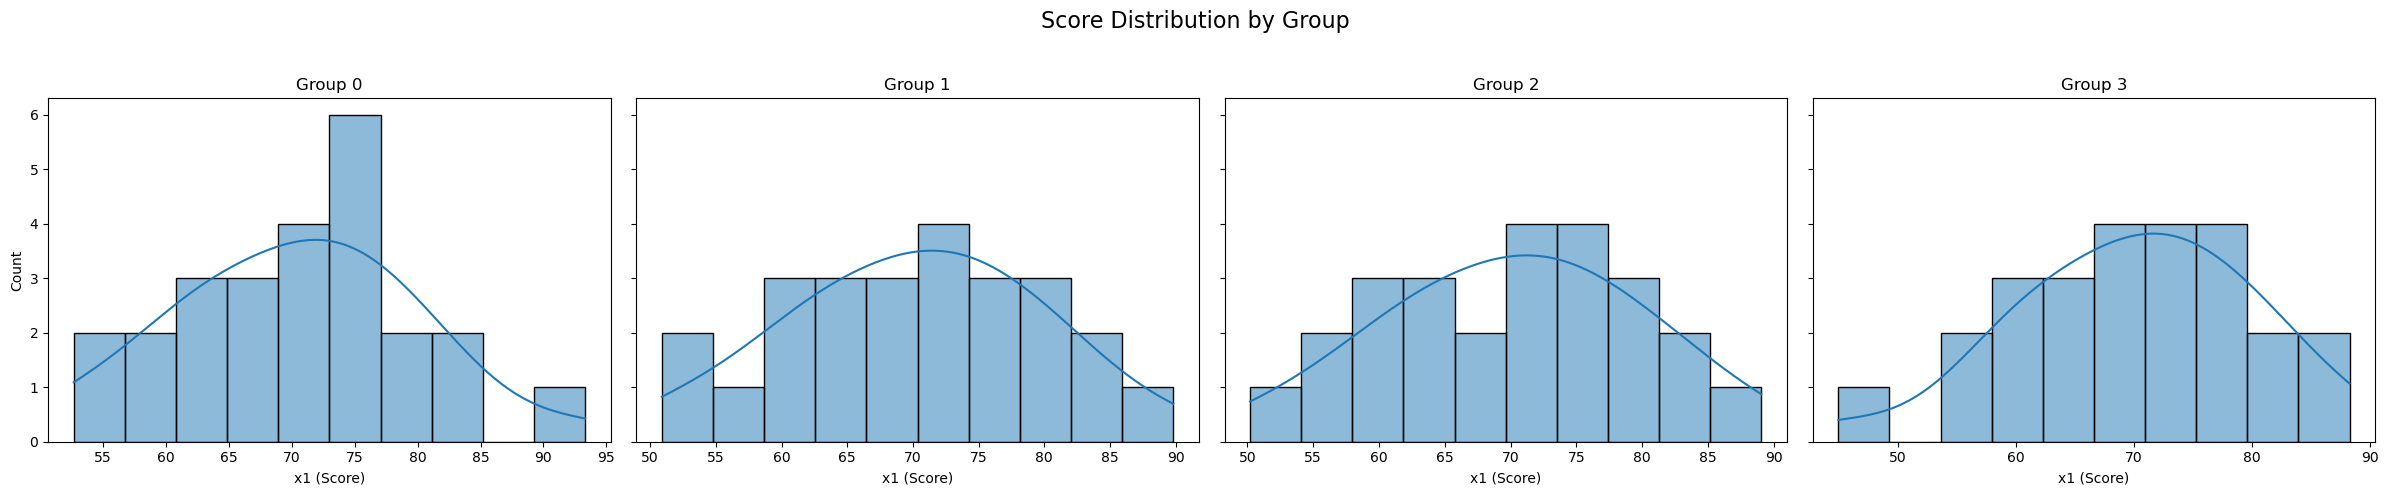

In [33]:
# 그룹별 시각화
# 고유 그룹 수
group_labels = sorted(df_sorted_first['group'].unique())
n_groups = len(group_labels)

# 서브플롯 생성
fig, axes = plt.subplots(1, n_groups, figsize=(6 * n_groups, 5), sharey=True)

# 그룹별 플롯 그리기
for i, g in enumerate(group_labels):
    ax = axes[i]
    sns.histplot(df_sorted_first[df_sorted_first['group'] == g]['x1'], 
                 kde=True, bins=10, alpha=0.5, ax=ax)
    ax.set_title(f"Group {g}")
    ax.set_xlabel("x1 (Score)")
    ax.set_ylabel("Count")

plt.suptitle("Score Distribution by Group", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [34]:
# 중앙에서 바깥쪽으로 (center-outward) 방식으로 그룹 통계 생성
import numpy as np

indices = list(df_sorted_first.index)
center_first = sorted(indices, key=lambda i: abs(i - len(df_sorted_first) // 2))

for i, idx in enumerate(center_first):
    group = i % group_count
    df_sorted_first.at[idx, 'group'] = group
print(df_sorted_first)

    index        name  sex     x1     x2  counseling group
0      18  Person_018    2  93.30  45.40           1     3
1      32  Person_032    1  89.82  65.40           1     1
2      96  Person_096    2  89.05  36.65           1     3
3      26  Person_026    2  88.31  58.00           1     1
4      66  Person_066    1  84.77  26.53           1     3
..    ...         ...  ...    ...    ...         ...   ...
95     19  Person_019    2  52.94  70.18           0     2
96     88  Person_088    2  52.68  66.29           0     0
97     36  Person_036    2  50.89  46.98           0     2
98     92  Person_092    1  50.20  48.03           0     0
99     83  Person_083    2  44.98  63.72           0     2

[100 rows x 7 columns]


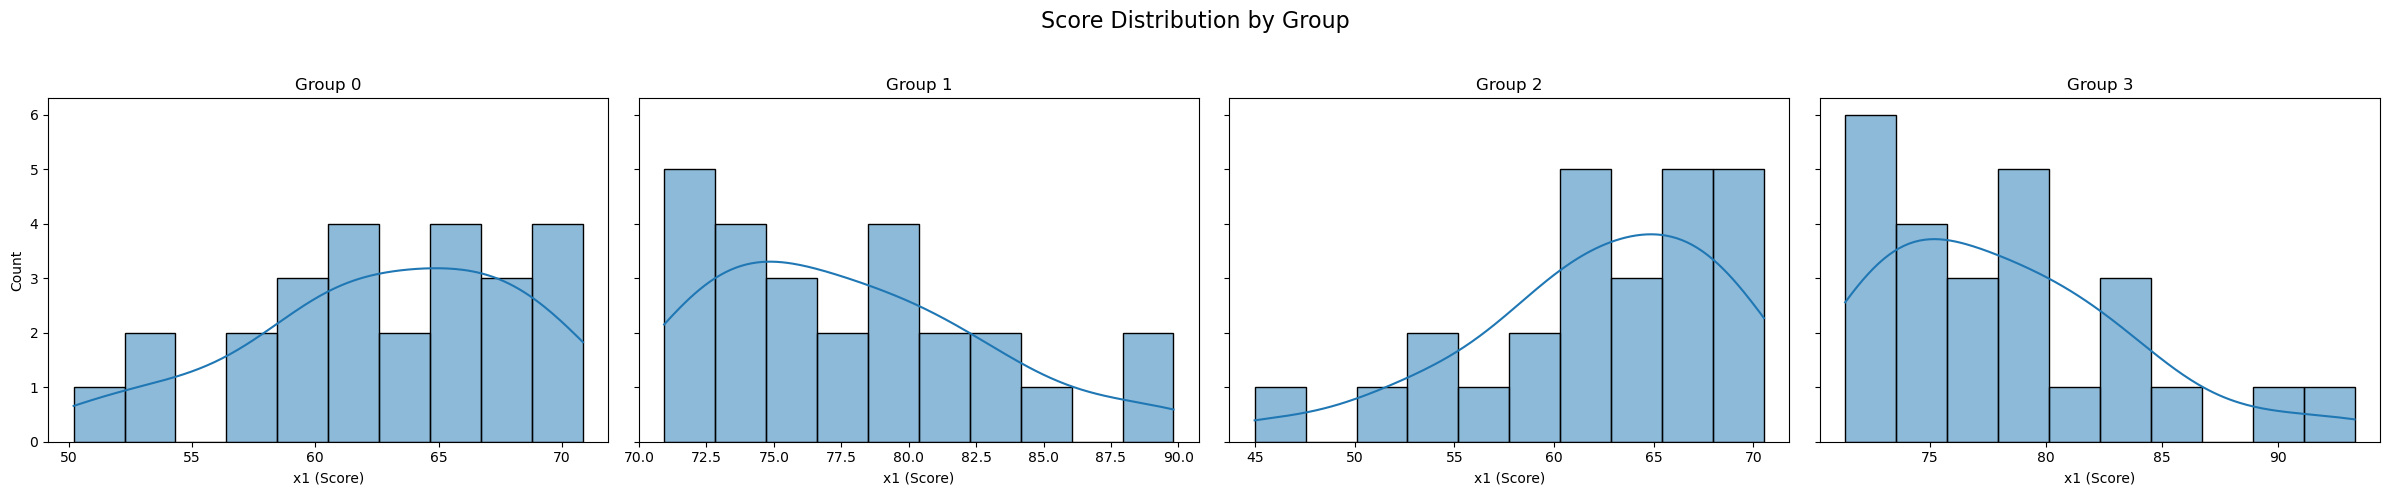

In [35]:
# 그룹별 시각화
group_labels = sorted(df_sorted_first['group'].unique())
n_groups = len(group_labels)

# 서브플롯 생성
fig, axes = plt.subplots(1, n_groups, figsize=(6 * n_groups, 5), sharey=True)

# 그룹별 플롯 그리기
for i, g in enumerate(group_labels):
    ax = axes[i]
    sns.histplot(df_sorted_first[df_sorted_first['group'] == g]['x1'], 
                 kde=True, bins=10, alpha=0.5, ax=ax)
    ax.set_title(f"Group {g}")
    ax.set_xlabel("x1 (Score)")
    ax.set_ylabel("Count")

plt.suptitle("Score Distribution by Group", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
# ! center-outward 방식은 좋아보이지 않음.

In [36]:
from collections import defaultdict

group_count = 4
category_columns = ['sex', 'counseling']
ideal_group_stats = defaultdict(lambda: defaultdict(float))

# 전체 빈도 계산
for _, row in df.iterrows():
    for col in category_columns:
        value = row[col]
        ideal_group_stats[col][value] += 1

# 이상적인 그룹 분배 계산
for category, value_counts in ideal_group_stats.items():
    print(f"[{category}]")  # 디버깅 출력
    for val, count in value_counts.items():
        if group_count == 0:
            raise ValueError("group_count must be greater than 0.")
        normalized = count / group_count
        ideal_group_stats[category][val] = normalized
        print(f"  {val}: {normalized:.2f}")

[sex]
  2: 16.25
  1: 8.75
[counseling]
  0: 18.50
  1: 6.50


In [37]:
# round-robin 방식으로 그룹 통계 생성
group_count = 4
for i, idx in enumerate(df_sorted_first.index):
    group = i % group_count # 나머지로 그룹 번호 결정 (0, 1, 2, 3)
    df_sorted_first.at[idx, 'group'] = group
print(df_sorted_first)

    index        name  sex     x1     x2  counseling group
0      18  Person_018    2  93.30  45.40           1     0
1      32  Person_032    1  89.82  65.40           1     1
2      96  Person_096    2  89.05  36.65           1     2
3      26  Person_026    2  88.31  58.00           1     3
4      66  Person_066    1  84.77  26.53           1     0
..    ...         ...  ...    ...    ...         ...   ...
95     19  Person_019    2  52.94  70.18           0     3
96     88  Person_088    2  52.68  66.29           0     0
97     36  Person_036    2  50.89  46.98           0     1
98     92  Person_092    1  50.20  48.03           0     2
99     83  Person_083    2  44.98  63.72           0     3

[100 rows x 7 columns]


In [38]:
group_count = 4
category_columns = ['sex', 'counseling']
group_stats = [defaultdict(lambda: defaultdict(int)) for _ in range(group_count)]

# ! 고려해야하는 것이 각 그룹, 범주명, 범주의 값 개수
for idx, row in df_sorted_first.iterrows(): # 각 행에 대해
    group_deviation_list = [] # 각 그룹의 편차를 저장할 리스트 초기화

    for g in range(group_count): # 각 그룹에 대해
        deviation_list = []

        for col in category_columns: # 각 범주형 변수에 대해
            val = row[col] # 현재 행의 범주형 변수의 값 성별이면 남자인지 여자인지?
            ideal_count = ideal_group_stats[col][val] # 이상적인 그룹 통계에서 해당 값의 이상적인 개수
            current_count = group_stats[g][col][val] # 현재 그룹 통계에서 해당 값의 개수
            projected_count = current_count + 1 # 해당 행이 해당 그룹에 추가되었을 때의 예상 개수

            # 편차 계산
            deviation = abs(projected_count - ideal_count) # 해당 행의 해당 값의 이상적인 개수와 현재 개수의 차이
            deviation_list.append(deviation) # 해당 범주형 변수의 편차를 리스트에 추가

        max_deviation = max(deviation_list) # 해당 그룹의 최대 편차
        group_deviation_list.append(max_deviation)

    # 가장 편차가 작은 그룹 찾기
    min_deviation = min(group_deviation_list) # 최소 편차
    best_group = group_deviation_list.index(min_deviation) # 최소 편차의 그룹 번호
    df_sorted_first.at[idx, 'group'] = best_group # 해당 행의 그룹 번호를 설정

    # group_stats 갱신
    for col in category_columns:
        val = row[col]
        group_stats[best_group][col][val] += 1

In [39]:
df_sorted_first

,index,name,sex,x1,x2,counseling,group
0,18,Person_018,2,93.30,45.40,1,0
1,32,Person_032,1,89.82,65.40,1,0
2,96,Person_096,2,89.05,36.65,1,0
3,26,Person_026,2,88.31,58.00,1,0
4,66,Person_066,1,84.77,26.53,1,0
...,...,...,...,...,...,...,...
95,19,Person_019,2,52.94,70.18,0,1
96,88,Person_088,2,52.68,66.29,0,2
97,36,Person_036,2,50.89,46.98,0,2
98,92,Person_092,1,50.20,48.03,0,2


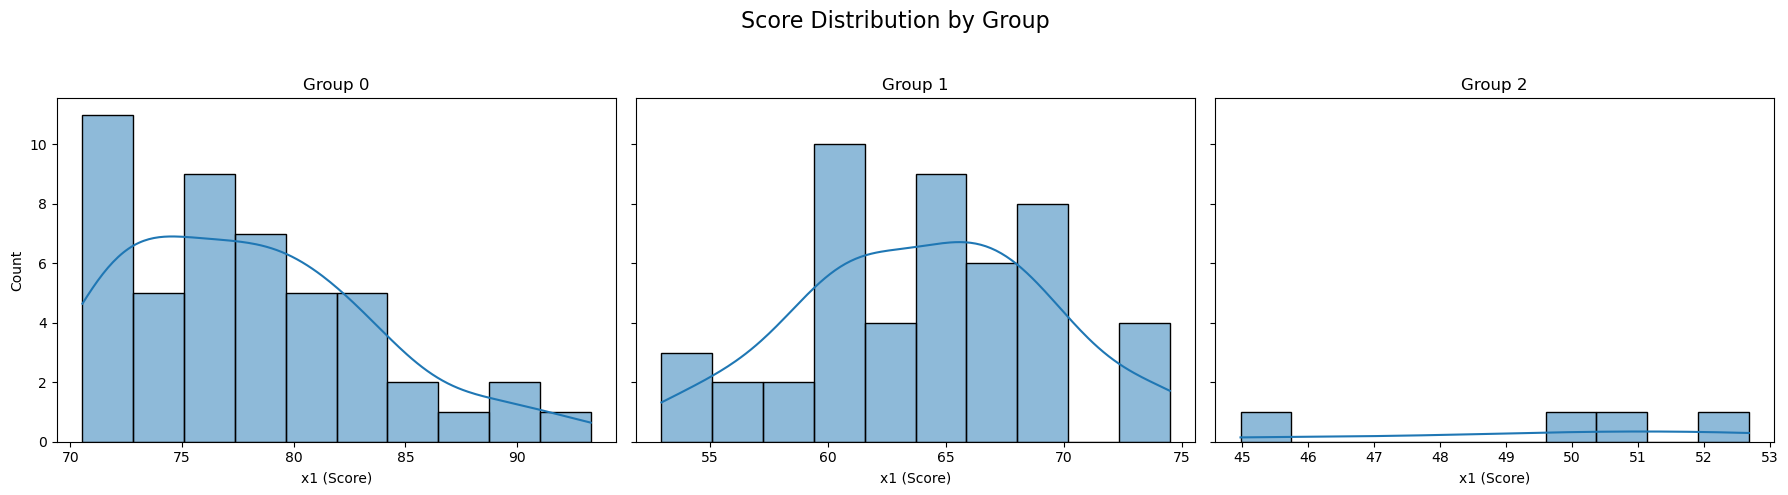

In [40]:
# 그룹별 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 고유 그룹 수
group_labels = sorted(df_sorted_first['group'].unique())
n_groups = len(group_labels)

# 서브플롯 생성
fig, axes = plt.subplots(1, n_groups, figsize=(6 * n_groups, 5), sharey=True)

# 그룹별 플롯 그리기
for i, g in enumerate(group_labels):
    ax = axes[i]
    sns.histplot(df_sorted_first[df_sorted_first['group'] == g]['x1'], 
                 kde=True, bins=10, alpha=0.5, ax=ax)
    ax.set_title(f"Group {g}")
    ax.set_xlabel("x1 (Score)")
    ax.set_ylabel("Count")

plt.suptitle("Score Distribution by Group", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [24]:
group_count = 4
category_columns = ['sex', 'counseling']
group_stats = [defaultdict(lambda: defaultdict(int)) for _ in range(group_count)]

# 연속형 변수 정렬
df_sorted = df.sort_values(by=category_columns).reset_index(drop=True)
df_sorted['group'] = -1

for idx, row in df_sorted.iterrows():
    best_group = None
    min_max_deviation = float('inf')

    for g in range(group_count):
        deviation_list = []

        for col in category_columns:
            val = row[col]
            ideal = ideal_group_stats[col][val]
            current = group_stats[g][col][val]
            projected = current + 1
            deviation = abs(projected - ideal)
            deviation_list.append(deviation)

        max_dev = max(deviation_list)

        if max_dev < min_max_deviation:
            min_max_deviation = max_dev
            best_group = g

    # 배정
    df_sorted.at[idx, 'group'] = best_group

    # group_stats 갱신
    for col in category_columns:
        val = row[col]
        group_stats[best_group][col][val] += 1

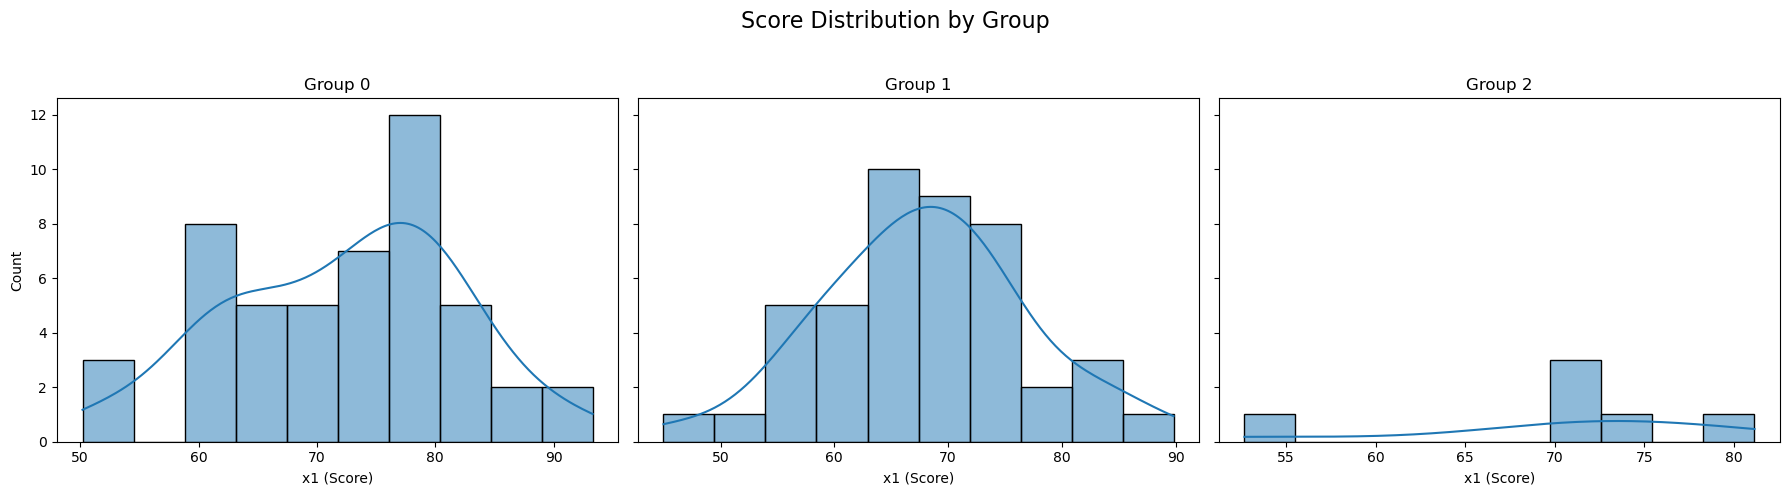

In [ ]:
# 그룹별 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 고유 그룹 수
group_labels = sorted(df_sorted['group'].unique())
n_groups = len(group_labels)

# 서브플롯 생성
fig, axes = plt.subplots(1, n_groups, figsize=(6 * n_groups, 5), sharey=True)

# 그룹별 플롯 그리기
for i, g in enumerate(group_labels):
    ax = axes[i]
    sns.histplot(df_sorted[df_sorted['group'] == g]['x1'], 
                 kde=True, bins=10, alpha=0.5, ax=ax)
    ax.set_title(f"Group {g}")
    ax.set_xlabel("x1 (Score)")
    ax.set_ylabel("Count")

plt.suptitle("Score Distribution by Group", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
# ! 개판같이 돌아감.

In [ ]:
df_sorted = df.sort_values(by=['x1', 'x2']).reset_index(drop=True)
group_count = 3
df_sorted['group'] = [i % group_count for i in range(len(df_sorted))] # 순수 정렬기반 그룹 할당

In [ ]:
group_stats = [defaultdict(lambda: defaultdict(int)) for _ in range(group_count)] # 각 그룹의 통계 저장용

for _, row in df_sorted.iterrows():
    g = row['group']
    for col in category_columns:
        val = row[col]
        group_stats[g][col][val] += 1 # 순수 정렬기반 그룹의 통계 갱신

In [ ]:
ideal_group_stats = defaultdict(lambda: defaultdict(float)) # 각 범주형 변수의 이상적인 그룹 통계 저장용
for _, row in df.iterrows():
    for col in category_columns:
        val = row[col]
        ideal_group_stats[col][val] += 1 # 전체 빈도 계산

for col in ideal_group_stats:
    for val in ideal_group_stats[col]:
        ideal_group_stats[col][val] /= group_count # 그룹 수로 나누어 이상적인 빈도 계산

In [ ]:
import copy

for idx, row in df_sorted.iterrows():
    current_group = row['group'] # 지금 학생이 속한 그룹
    best_group = current_group # 더 좋은 그룹이 있다면 이 변수에 저장 (초기값은 현재 그룹)
    min_deviation = float('inf') # 가장 낮은 편차값을 기록할 변수 (초기값은 무한대)

    for g in range(group_count):
        if g == current_group: # 지금 학생이 속한 그룹과 비교해봐야 소용이 없으므로 스킵
            continue  # 같은 그룹이면 의미 없음(건너뛰기) !continue 하단의 코드는 전부 생략됨.

        # projected group_stats 복사해서 시뮬레이션
        simulated_stats = copy.deepcopy(group_stats) # 학생이 해당 그룹으로 이동을 가정하기 위한 시뮬레이션을 위한 복사본 (아직 이동 안함)

        # (시뮬레이션을 위한) 현재 그룹에서 값 제거 -> 해당 학생이 다른 그룹으로 이동한다는 시뮬레이션
        for col in category_columns:
            val = row[col]
            simulated_stats[current_group][col][val] -= 1 # 현재 그룹(current_group)에서 해당 값의 개수 감소
            simulated_stats[g][col][val] += 1 # 새로운 그룹(g)에 해당 값의 개수 증가 (이동을 가짐)

        # (시뮬레이션을 위한) 전체 편차 계산 (예: max deviation 방식)
        total_dev = 0
        for gg in range(group_count): # 각 그룹에 대해
            for col in category_columns: # 각 범주형 변수에 대해
                for val in ideal_group_stats[col]: # 각 범주형 변수의 값에 대해
                    current = simulated_stats[gg][col][val] # 현재 그룹에서 해당 값의 개수
                    ideal = ideal_group_stats[col][val] # 이상적인 그룹 통계에서 해당 값의 이상적인 개수
                    total_dev += abs(current - ideal) # 해당 그룹에서 해당 값의 개수와 이상적인 개수의 차이의 모든 변수의 절댓값을 더함
                    
                    # ! 여기서 의문인 점이 있음
                    # 범주형 모든 변수의 해당 학생의 값이 해당 그룹에 속했을 때의 편차를 계산하는 것인데
                    # 예를 들어 남자(1)이고 상담 유무(0)인 학생이 그룹 1으로 이동할 떄와
                    # 그룹 2로 이동할 때의 편차를 계산한다고 했을 때
                    # 그룹 1의 편차의 합은 15, 그룹 2의 편차의 합은 10이라고 가정했을 때
                    # 그룹 1으로 이동했을 때의 편차가 더 크므로 그룹 2로 이동하는 것이 더 좋다고 판단함.
                    # 그러나 그룹 2로 이동하면 편차의 합 입장에서는 이상적이겠지만, 각 범주형 변수의 차이에 대해선 이상적일까?

                    # ! 여기서 의문인 점이 있음
                    # 범주형 변수 중 예를 들어 상담 유무와 같이 1: 상담 있음, 0: 상담 없음
                    # 1이라는 값의 빈도 자체가 적은 경우
                    # 값 자체의 편차다 보니 절대적으로 값이 작은 상담 유무에서의 유(1)과 같은 경우
                    # 편차 역시 작게 나올 수 있어서 범주형 변수의 빈도 균형을 맞출때 영향을 덜 미칠 수 있지 않을까?


        if total_dev < min_deviation: # 현재 그룹에서 이동한 그룹의 편차가 최소 편차보다 작다면
            min_deviation = total_dev # 최소 편차 갱신
            best_group = g # 최소 편차의 그룹 번호 갱신

    # 최소 편차의 그룹 번호를 갱신 한 경우
    if best_group != current_group:
        df_sorted.at[idx, 'group'] = best_group
        for col in category_columns:
            val = row[col]
            group_stats[current_group][col][val] -= 1 # 현재 그룹에서 해당 값의 개수 감소
            group_stats[best_group][col][val] += 1 # 새로운 그룹에서 해당 값의 개수 증가

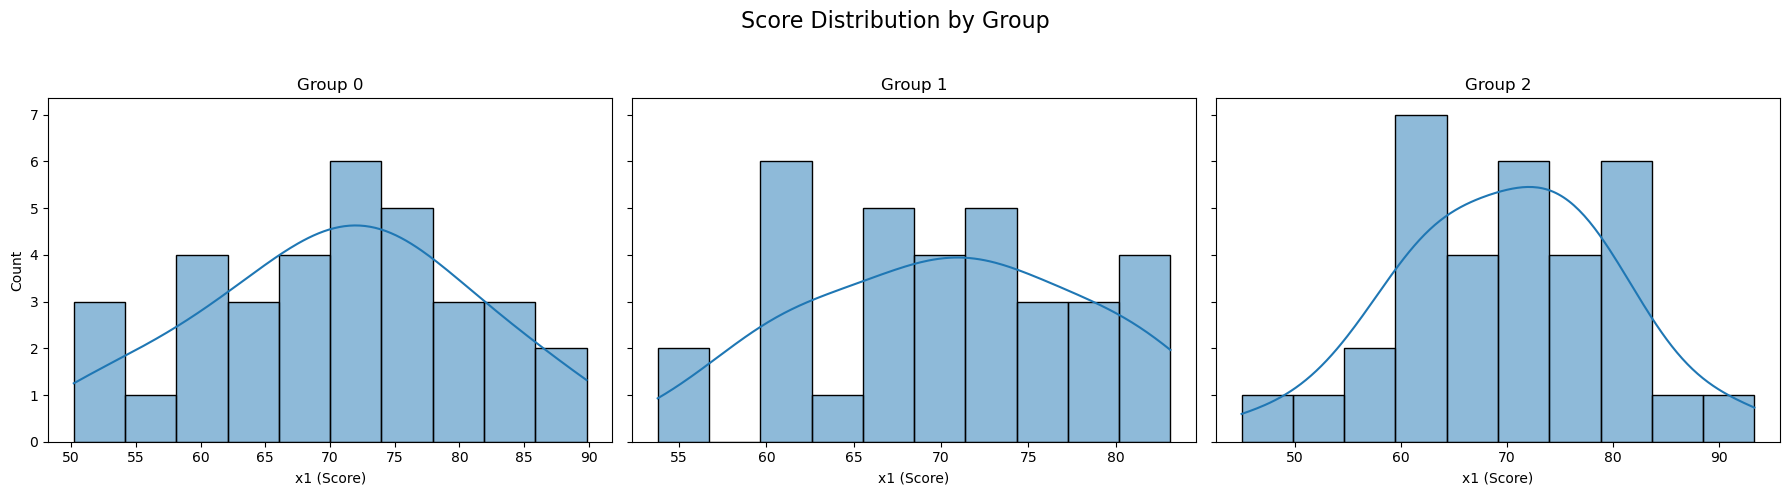

In [81]:
# 그룹별 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 고유 그룹 수
group_labels = sorted(df_sorted['group'].unique())
n_groups = len(group_labels)

# 서브플롯 생성
fig, axes = plt.subplots(1, n_groups, figsize=(6 * n_groups, 5), sharey=True)

# 그룹별 플롯 그리기
for i, g in enumerate(group_labels):
    ax = axes[i]
    sns.histplot(df_sorted[df_sorted['group'] == g]['x1'], 
                 kde=True, bins=10, alpha=0.5, ax=ax)
    ax.set_title(f"Group {g}")
    ax.set_xlabel("x1 (Score)")
    ax.set_ylabel("Count")

plt.suptitle("Score Distribution by Group", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [82]:
# 그룹별 sex, counseling 통계
for col in category_columns:
    print(f"[{col}]")
    for g in range(group_count):
        counts = df_sorted[df_sorted['group'] == g][col].value_counts()
        for val, count in counts.items():
            print(f"  Group {g}, {val}: {count}")
    print()  # 줄바꿈

[sex]
  Group 0, 2: 22
  Group 0, 1: 12
  Group 1, 2: 21
  Group 1, 1: 12
  Group 2, 2: 22
  Group 2, 1: 11

[counseling]
  Group 0, 0: 26
  Group 0, 1: 8
  Group 1, 0: 24
  Group 1, 1: 9
  Group 2, 0: 24
  Group 2, 1: 9



In [83]:
for key, value in ideal_group_stats.items():
    print(f"[{key}]")
    for val, count in value.items():
        print(f"  {val}: {count:.2f}")
    print()  # 줄바꿈

[sex]
  2: 21.67
  1: 11.67

[counseling]
  0: 24.67
  1: 8.67

